# Laboratory 4 - Page Rank
#### Grzegorz Fotyga

## 1 Introduction
In this lab assignment you will explore one of the most famous algorithms of recent years: the PageRank.


In 1998 Sergey Brin and Larry Page published a paper in which they presented a link analysis algorithm named PageRank. Shortly afterwards Page and Brin founded Google Inc., the company behind the Google search engine, with PageRank lying at the heart of the engine, and determining which of the web pages meeting the user-specified criteria should be displayed as search results. The algorithm assigns a numerical weight to every element of a set of hyperlinked web pages and the weight specifies the relative importance of a certain page among the others. Mathematically the weight (or rank) associated with any particular web page is a probability that a web surfer randomly clicking on links will arrive at the page.



## 2. Basics of PageRank

The main idea is that the value of PageRank for a specific WWW page is computed using PageRank values for all web pages which link to that page. Suppose the entire World Wide Web is composed of four web pages named A, B, C, D. Suppose page A has a link to pages: B, C and D, page B has a link to page D, page C has a link to page A, and page D has links to A and C. The table of connections and a graph of this network are shown in the figure below.

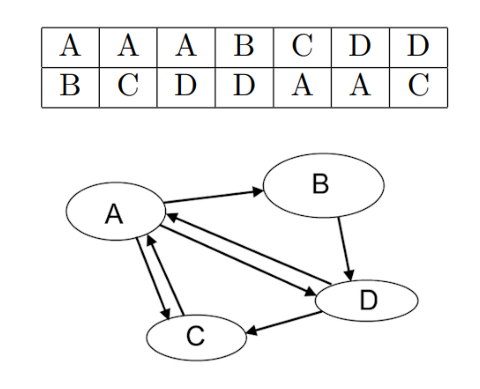

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('figure_1.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In its simplest form the PageRank (PR) for D is computed as follows:

$PR(D) = \dfrac{PR(A)}{3} + \dfrac{PR(B)}{1}$          

i.e. page rank of D equals the sum of page ranks for all pages which link to page D, with each rank divided by the number of outgoing links for each page, i.e. 3 outgoing links for page A and 1 outgoing link for B.


## 3. PageRank – system of linear equations

Note that the main goal of the following tasks is not to understand how the PR algorithm works. The main goal is to implement the formulas below and analyze the results.


The set of equations for all the pages can be written using matrix notation:

$\mathbf{M}\mathbf{r} = \mathbf{b}$

where:
- $\mathbf{r}$ is a vector of page ranks for all web pages
- the right hand side vector $\mathbf{b}$ – has $n$ elements, all equal to $(1 − d)/n$, where $d$ is so-called a
damping factor.
- matrix $\mathbf{M}$ is sparse and is defined as follows:

$\mathbf{M} = \mathbf{I} - d\mathbf{B}\mathbf{A}$

- $\mathbf{I}$ is the identity matrix
- $\mathbf{B}$ is the adjacency matrix (square matrix used to represent a finite graph):


$  \mathbf{B} = \begin{bmatrix}
 			 b(1,1) &  b(1,2) &   \dots &  b(1,n)  \\
 			 b(2,1) &  b(2,2) &   \dots &  b(2,n)  \\
 			 \dots &   \dots &   \dots &   \dots  \\
 			 b(n,1) &  b(n,2) &   \dots &  b(n,n) \\
 			 \end{bmatrix}$

where $b(i, j) = 1$, if page $j$ links to $i$ and $b(i, j) = 0$ otherwise.

- $\mathbf{A}$  is diagonal matrix:

$  \mathbf{A} = \begin{bmatrix}
 			 1/L(1) &  0 &   \dots &  0  \\
 			 0 &  1/L(2) &   \dots &  0  \\
 			 \dots &   \dots &   \dots &   \dots  \\
 			 0 &  0 &   \dots &  1/L(n) \\
 			 \end{bmatrix}$

where $L(i)$ is the number of links outgoing from $i$-th page. It can be computed by summing up the column elements of $\mathbf{B}$ matrix.

Finally, $\mathbf{r}$ vector (solution of the system: $\mathbf{M}\mathbf{r} = \mathbf{b}$) contains the PageRanks of all $n$ pages.

## 4. Tasks

Solving this tasks requires searching for a procedure related to the numpy library and reviewing the documentation.

Task 1. Analyze the network shown below. What do you think - which page is the most important one? Generate Numpy array called: Edges with 2 rows and 15 columns (corresponding to all connections), similar to a tabel shown in Section 2. Note that some connectrions have two directions.

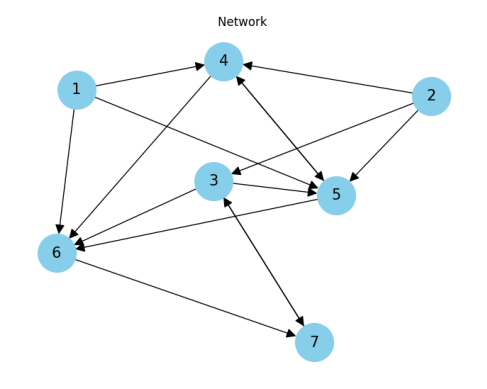

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('figure_2.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [8]:
import numpy as np

# Generate Edges
# Edges = np.array([[1, 1, 1, 2, ...],
#                  [4, 6, 5, 3,...]])
Edges = np.array([[1,1,1,2,2,2,3,3,3,4,4,5,5,6,7],
                  [4,5,6,3,4,5,5,6,7,5,6,4,6,7,3]])
print(Edges.shape)

(2, 15)


Task 2. Generate vector $\mathbf{b}$, assuming: $n = 7$ and $d = 0.85$

Task 3. Generate matrices: $\mathbf{I}$, $\mathbf{B}$ and $\mathbf{A}$ with full format (not sparse).

Task 4. Generate matrix $\mathbf{M}$

Task 5. Solve system of linear equations using $np.linalg.solve()$

Task 6. Plot $\mathbf{r}$ vector. Which page is the most important in the network? Is it consistent with your prediciotns? Write short comment.  

In [48]:
# Task 2
n = 7
d = 0.85
b = np.full((n,), (1 - d) / n)
b

array([0.02142857, 0.02142857, 0.02142857, 0.02142857, 0.02142857,
       0.02142857, 0.02142857])

In [49]:
# Task 3
I = np.eye(n)
print(f"Identity matrix I:\n{I}")

B = np.zeros((n, n))
for i in range(Edges.shape[1]): # shape = (2,15)
    page_from = Edges[0, i] - 1  # j
    page_to = Edges[1, i] - 1    # i
    B[page_to, page_from] = 1    # B[i, j] = 1

print(f"Adjacency matrix B:\n{B}")

L = {1 : 3, 2 : 3, 3 : 3, 4 : 2, 5 : 2, 6 : 1, 7 : 1}
A = np.zeros((n, n))
j = 0
for i in range(A.shape[0]):
  A[i][j] = 1/L[i+1]
  j +=1
print(f"Diagonal matrix A:\n{A}")

Identity matrix I:
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
Adjacency matrix B:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]]
Diagonal matrix A:
[[0.33333333 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]


In [50]:
# Task 4
M = I - d * (B @ A)
print(f"M matrix :\n{M}")

M matrix :
[[ 1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.         -0.28333333  1.          0.          0.          0.
  -0.85      ]
 [-0.28333333 -0.28333333  0.          1.         -0.425       0.
   0.        ]
 [-0.28333333 -0.28333333 -0.28333333 -0.425       1.          0.
   0.        ]
 [-0.28333333  0.         -0.28333333 -0.425      -0.425       1.
   0.        ]
 [ 0.          0.         -0.28333333  0.          0.         -0.85
   1.        ]]


In [51]:
# Task 5
r = np.linalg.solve(M, b)

print(f"Solution vector r:\n{r}")

Solution vector r:
[0.02142857 0.02142857 0.25161412 0.09536271 0.14539125 0.2011111
 0.26366368]


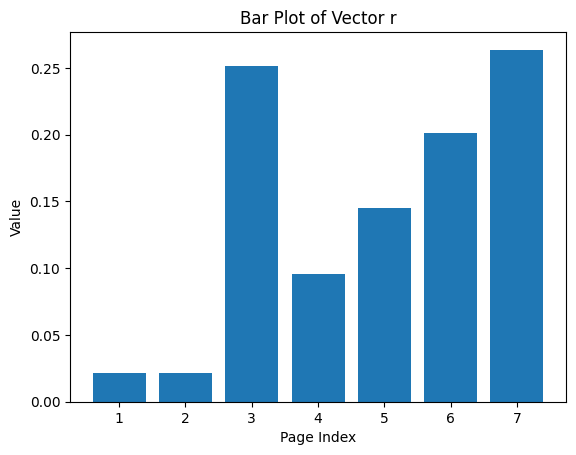

In [52]:
# Task 6
indices = np.arange(len(r)) + 1
plt.bar(indices, r)

# Add labels and title
plt.xlabel('Page Index')
plt.ylabel('Value')
plt.title('Bar Plot of Vector r')
plt.show()

In [53]:
print(f"""
The page with the highest PageRank score is usually the one that has the most inbound links from other highly-ranked pages.
In other words, it's the page that is most frequently referenced by other important pages. So we can see that pages 1 and 2
are not referenced by other pages, so their score is low. Pages 3, 6, 7 are referenced by other pages so their score is high.
""")


The page with the highest PageRank score is usually the one that has the most inbound links from other highly-ranked pages. 
In other words, it's the page that is most frequently referenced by other important pages. So we can see that pages 1 and 2
are not referenced by other pages, so their score is low. Pages 3, 6, 7 are referenced by other pages so their score is high.



## Sparse matrix format

The matrices used in the calculations contain relatively few non-zero elements. Therefore, all calculations should be performed in a sparse format. We will use the CSR format here, discussed in the image below (taken from [1]).

[1] Altinkaynak, Atakan. "An efficient sparse matrix‐vector multiplication on CUDA‐enabled graphic processing units for finite element method simulations." International Journal for Numerical Methods in Engineering 110.1 (2017): 57-78.

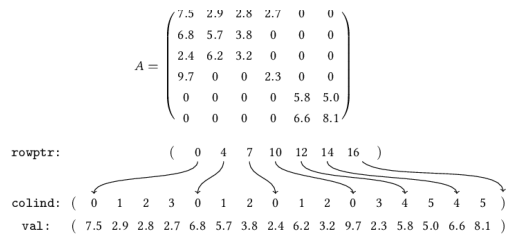

In [54]:
img = mpimg.imread('figure_3.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

Task 7. The code below shows two THE SAME matrices. The first one is stored in full format, the second in sparse format. Compare the memory storage of these two matrices using *sys.getsizeof(matrix)* function. Write short comment.

In [55]:
import sys
from scipy.sparse import csr_matrix

n = 1000
A_full_format = np.zeros((n,n))
A_full_format[0,0] = 100

A_sparse_format = csr_matrix((n,n))
A_sparse_format[0,0] = 100

# your code
print(f"Full format: {sys.getsizeof(A_full_format)}")
print(f"Full format: {sys.getsizeof(A_sparse_format)}")

print(f"In the case of a sparse matrix, substantial memory requirement reductions can be realized by storing only the non-zero entries.")

Full format: 8000128
Full format: 48
In the case of a sparse matrix, substantial memory requirement reductions can be realized by storing only the non-zero entries.


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Task 8. Do tasks 2-6 using the CSR format for matrices: $\mathbf{I}$, $\mathbf{B}$, $\mathbf{A}$ and $\mathbf{M}$.

To solve system of equations use: *spsolve(M, b)*

Task 9. Zip everything and upload on enauczanie.

In [77]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

In [78]:
I_csr = csr_matrix((n,n))
I_csr

<7x7 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [80]:
B_csr = csr_matrix((n, n))
for i in range(Edges.shape[1]): # shape = (2,15)
    page_from = Edges[0, i] - 1  # j
    page_to = Edges[1, i] - 1    # i
    B_csr[page_to, page_from] = 1    # B[i, j] = 1

print(f"Adjacency matrix B:\n{B_csr}")

Adjacency matrix B:
  (2, 1)	1.0
  (2, 6)	1.0
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 3)	1.0
  (5, 0)	1.0
  (5, 2)	1.0
  (5, 3)	1.0
  (5, 4)	1.0
  (6, 2)	1.0
  (6, 5)	1.0


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [81]:
A_csr = csr_matrix((n, n))
j = 0
for i in range(A_csr.shape[0]):
  A_csr[i, j] = 1/L[i+1] # [i][j] does not work
  j +=1
print(f"Diagonal matrix A_csr:\n{A_csr}")

Diagonal matrix A_csr:
  (0, 0)	0.3333333333333333
  (1, 1)	0.3333333333333333
  (2, 2)	0.3333333333333333
  (3, 3)	0.5
  (4, 4)	0.5
  (5, 5)	1.0
  (6, 6)	1.0


In [87]:
M_csr = I_csr - d * (B_csr @ A_csr)
print(f"M_scr matrix :\n{M_csr}")

M_scr matrix :
  (2, 1)	-0.2833333333333333
  (2, 6)	-0.85
  (3, 0)	-0.2833333333333333
  (3, 1)	-0.2833333333333333
  (3, 4)	-0.425
  (4, 0)	-0.2833333333333333
  (4, 1)	-0.2833333333333333
  (4, 2)	-0.2833333333333333
  (4, 3)	-0.425
  (5, 0)	-0.2833333333333333
  (5, 2)	-0.2833333333333333
  (5, 3)	-0.425
  (5, 4)	-0.425
  (6, 2)	-0.2833333333333333
  (6, 5)	-0.85


In [83]:
print(f"Type = {type(M_csr)}")

Type = <class 'scipy.sparse._csr.csr_matrix'>


In [93]:
b_csr = csr_matrix(b)
print(b_csr)

  (0, 0)	0.021428571428571432
  (0, 1)	0.021428571428571432
  (0, 2)	0.021428571428571432
  (0, 3)	0.021428571428571432
  (0, 4)	0.021428571428571432
  (0, 5)	0.021428571428571432
  (0, 6)	0.021428571428571432


In [95]:
print(M_csr)

  (2, 1)	-0.2833333333333333
  (2, 6)	-0.85
  (3, 0)	-0.2833333333333333
  (3, 1)	-0.2833333333333333
  (3, 4)	-0.425
  (4, 0)	-0.2833333333333333
  (4, 1)	-0.2833333333333333
  (4, 2)	-0.2833333333333333
  (4, 3)	-0.425
  (5, 0)	-0.2833333333333333
  (5, 2)	-0.2833333333333333
  (5, 3)	-0.425
  (5, 4)	-0.425
  (6, 2)	-0.2833333333333333
  (6, 5)	-0.85


In [101]:
M_csr.shape, b_csr.shape

((7, 7), (1, 7))

In [102]:
b_csr = b_csr.T
r_csr = spsolve(M_csr, b_csr)
print(f"Solution vector r:\n{r_csr}")

Solution vector r:
[nan nan nan nan nan nan nan]


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:293: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
